In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
df = yf.download('GLD', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,109.820000,110.139999,109.309998,109.800003,109.800003,16224100
2010-01-05,109.879997,110.389999,109.260002,109.699997,109.699997,14213100
2010-01-06,110.709999,111.769997,110.410004,111.510002,111.510002,24981900
2010-01-07,111.070000,111.290001,110.620003,110.820000,110.820000,13609800
2010-01-08,111.519997,111.580002,110.260002,111.370003,111.370003,15894600


In [4]:
ma = 21
df['returns'] = np.log(df['Close']).diff()
df['ma'] = df['Close'].rolling(ma).mean()
df['ratio'] = df['Close'] / df['ma']

In [5]:
df['ratio'].describe()

count    3259.000000
mean        1.001528
std         0.024216
min         0.862830
25%         0.987401
50%         1.001373
75%         1.017014
max         1.106130
Name: ratio, dtype: float64

In [6]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(df['ratio'].dropna(), percentiles)

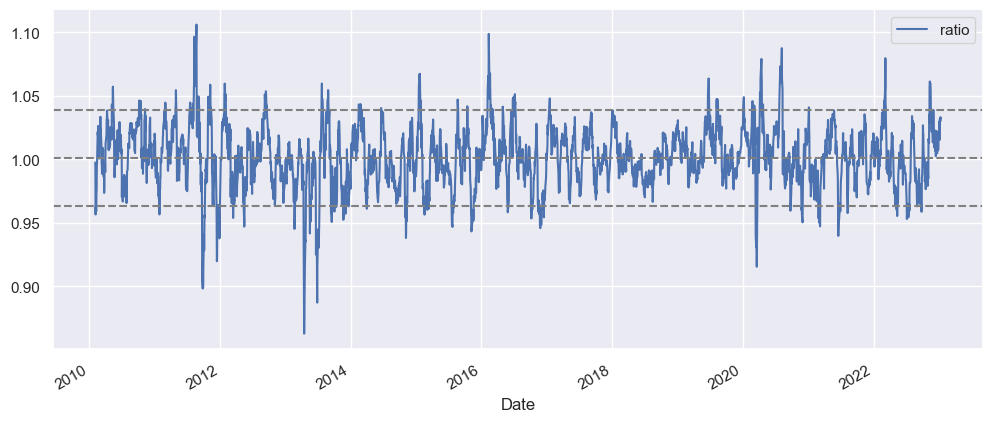

In [7]:
plt.figure(figsize=(12,5))
df['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c = (.5, .5, .5), ls='--')
plt.axhline(p[2], c = (.5, .5, .5), ls='--')
plt.axhline(p[-1], c = (.5, .5, .5), ls='--')

In [8]:
short_pos = p[-1]
long_pos = p[0]

df['position'] = np.where(df.ratio > short_pos, -1, np.nan)
df['position'] = np.where(df.ratio < long_pos, 1, df['position'])

df['position'] = df['position'].ffill()

<AxesSubplot:xlabel='Date'>

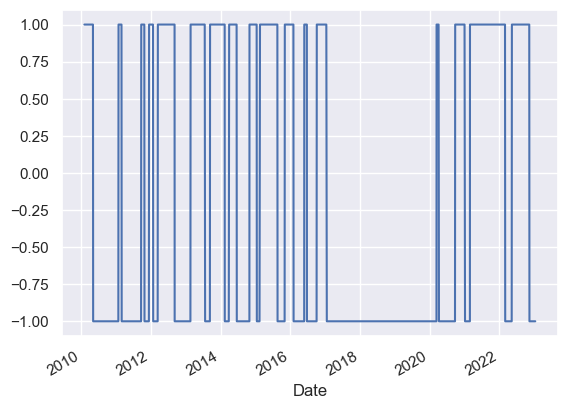

In [9]:
df.position.plot()

In [10]:
df['strat_returns'] = df['returns'] * df['position'].shift()

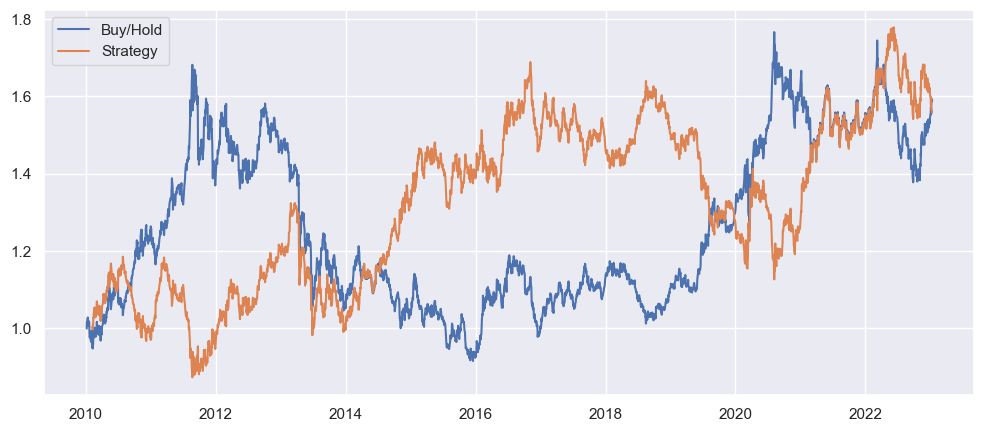

In [11]:
plt.figure(figsize=(12,5))
plt.plot(np.exp(df['returns'].dropna()).cumprod(), label = "Buy/Hold")
plt.plot(np.exp(df['strat_returns'].dropna()).cumprod(), label = "Strategy")
plt.legend()

In [12]:
buyHold = (df['returns'].pct_change() + 1).cumprod()
strategy = (df['strat_returns'].pct_change() + 1).cumprod()

print(f'Mean Reversion: {strategy}\nBuy/hold: {buyHold}')

Mean Reversion: Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
              ..
2023-01-05   NaN
2023-01-06   NaN
2023-01-09   NaN
2023-01-10   NaN
2023-01-11   NaN
Name: strat_returns, Length: 3279, dtype: float64
Buy/hold: Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06   -17.959438
2010-01-07     6.811801
2010-01-08    -5.433122
                ...    
2023-01-05          NaN
2023-01-06          NaN
2023-01-09          NaN
2023-01-10          NaN
2023-01-11          NaN
Name: returns, Length: 3279, dtype: float64
